In [2]:
 import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [4]:
 # Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [5]:
 # Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


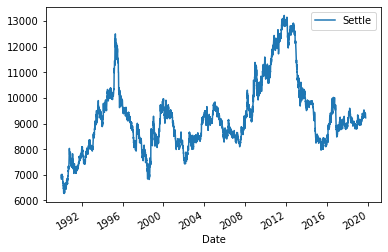

In [13]:
 # Plot just the "Settle" column from the dataframe:
# YOUR CODE HERE!
yen_futures.plot(kind='line',y='Settle')

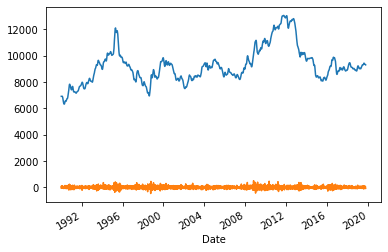

In [16]:
 import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the "Settle" price into two separate series:
# YOUR CODE HERE!
yen_noise, yen_trend = sm.tsa.filters.hpfilter(yen_futures["Settle"])
yen_trend.plot()
yen_noise.plot()

In [18]:
# Create a dataframe of just the settle price, and add columns for "noise" and "trend" series from above:
# YOUR CODE HERE!
combined_yen = pd.concat([yen_futures["Settle"], yen_noise, yen_trend], axis='columns', join='inner')
combined_yen

,Settle,Settle_cycle,Settle_trend
Date,,,
1990-01-02,6847.0,-61.503967,6908.503967
1990-01-03,6887.0,-21.799756,6908.799756
1990-01-04,7008.0,98.942896,6909.057104
1990-01-05,6950.0,40.776052,6909.223948
1990-01-08,6959.0,49.689938,6909.310062
...,...,...,...
2019-10-09,9338.0,24.939247,9313.060753
2019-10-10,9303.5,-5.868559,9309.368559
2019-10-11,9251.0,-54.454594,9305.454594


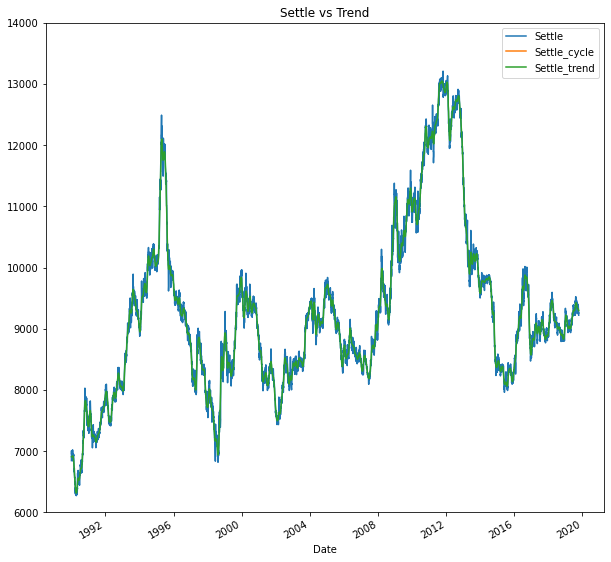

In [35]:
 # Plot the Settle Price vs. the Trend for 2015 to the present
# YOUR CODE HERE!
combined_yen.plot(ylim=(6000,14000),title='Settle vs Trend',figsize=(10,10))

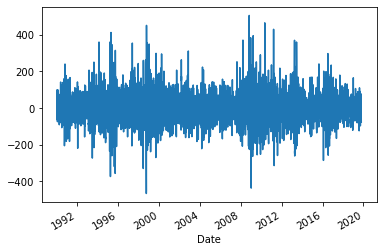

In [34]:
# Plot the Settle Noise
# YOUR CODE HERE!
combined_yen['Settle_cycle'].plot()

In [36]:
 # Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (yen_futures[["Settle"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Settle
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


In [37]:
 import statsmodels.api as sm

# Estimate and ARMA model using statsmodels (use order=(2, 1))
# YOUR CODE HERE!
from statsmodels.tsa.arima_model import ARMA
model = ARMA(returns.values, order=(2,1))


# Fit the model and assign it to a variable called results
# YOUR CODE HERE!
results = model.fit()

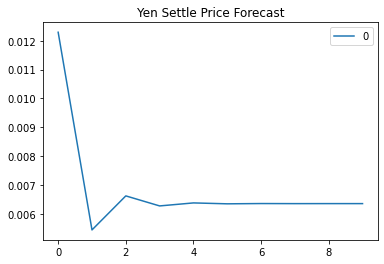

In [38]:
 # Output model summary results:
# YOUR CODE HERE!
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Yen Settle Price Forecast")

In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7514
Model:                     ARMA(2, 1)   Log Likelihood               -7894.071
Method:                       css-mle   S.D. of innovations              0.692
Date:                Mon, 26 Oct 2020   AIC                          15798.142
Time:                        18:56:17   BIC                          15832.765
Sample:                             0   HQIC                         15810.030
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.008      0.804      0.421      -0.009       0.022
ar.L1.y       -0.3060      1.278     -0.240      0.811      -2.810       2.198
ar.L2.y       -0.0019      0.019     -0.099      0.921      -0.040       0.036
ma.L1.y        0.2945      1.278      0.230      0.818      -2.209       2.798
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3371           +0.0000j            3.3371            0.5000
AR.2         -157.2793           +0.0000j          157.2793            0.5000
MA.1           -3.3961           +0.0000j            3.3961            0.5000
-----------------------------------------------------------------------------
"""

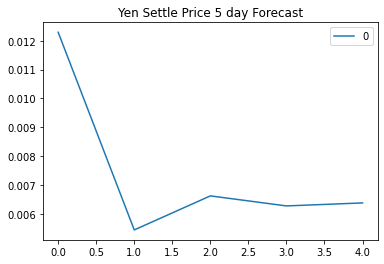

In [41]:
# Plot the 5 Day Returns Forecast
# YOUR CODE HERE!
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="Yen Settle Price 5 day Forecast")

In [42]:
############## ARIMA MODEL ###########
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
# YOUR CODE HERE!
model = ARIMA(returns.values, order=(5, 1, 1))

# Fit the model
# YOUR CODE HERE!
results2 = model.fit()

In [45]:
 # Output model summary results:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 7513
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -7895.595
Method:                       css-mle   S.D. of innovations              0.692
Date:                Mon, 26 Oct 2020   AIC                          15807.189
Time:                        19:05:27   BIC                          15862.585
Sample:                             1   HQIC                         15826.210
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.202e-06   3.56e-06     -0.900      0.368   -1.02e-05    3.77e-06
ar.L1.D.y     -0.0118      0.012     -1.026      0.305      -0.034       0.011
ar.L2.D.y     -0.0004      0.012     -0.036      0.971      -0.023       0.022
ar.L3.D.y     -0.0131      0.012     -1.136      0.256      -0.036       0.010
ar.L4.D.y     -0.0194      0.012     -1.684      0.092      -0.042       0.003
ar.L5.D.y     -0.0022      0.012     -0.191      0.848      -0.025       0.020
ma.L1.D.y     -0.9999      0.000  -2478.552      0.000      -1.001      -0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7453           -1.7612j            2.4795           -0.1257
AR.2            1.7453           +1.7612j            2.4795            0.1257
AR.3           -2.0616           -2.1836j            3.0030           -0.3704
AR.4           -2.0616           +2.1836j            3.0030            0.3704
AR.5           -8.1693           -0.0000j            8.1693           -0.5000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

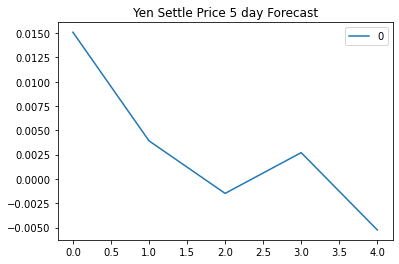

In [44]:
# Plot the 5 Day Price Forecast
# YOUR CODE HERE!
pd.DataFrame(results2.forecast(steps=5)[0]).plot(title="Yen Settle Price 5 day Forecast")

In [47]:
######## GARCH #########
import arch 
from arch import arch_model
# Estimate a GARCH model:
# YOUR CODE HERE!
model = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)
# Fit the model
# YOUR CODE HERE!
results3 = model.fit(disp="off")

In [48]:
 # Summarize the model results
# YOUR CODE HERE!
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Settle   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7461.93
Distribution:                  Normal   AIC:                           14931.9
Method:            Maximum Likelihood   BIC:                           14959.6
                                        No. Observations:                 7514
Date:                Mon, Oct 26 2020   Df Residuals:                     7510
Time:                        19:09:44   Df Model:                            4
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.2896e-03  2.057e-03      2.085  3.708e-02  [2.571e-04,8.322e-03]
alpha[1]       0.0381  1.282e-02      2.970  2.974e-03  [1.295e-02,6.321e-02]
alpha[2]       0.0000  1.703e-02      0.000      1.000 [-3.338e-02,3.338e-02]
beta[1]        0.9536  1.420e-02     67.135      0.000      [  0.926,  0.981]
=============================================================================

Covariance estimator: robust
"""

In [49]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2019-10-15'

In [51]:
 # Create a 5 day forecast of volatility
forecast_horizon = 5
# Start the forecast using the last_day calculated above
# YOUR CODE HERE!
garch_forecasts = results3.forecast(start='2019-10-15', horizon=forecast_horizon)
garch_forecasts

In [52]:
# Annualize the forecast
intermediate = np.sqrt(garch_forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2019-10-15,7.434048,7.475745,7.516867,7.557426,7.597434


In [53]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2019-10-15
h.1,7.434048
h.2,7.475745
h.3,7.516867
h.4,7.557426
h.5,7.597434


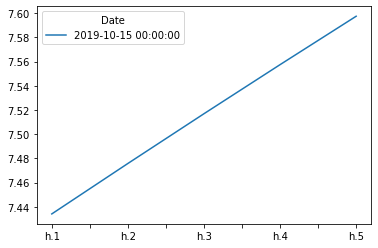

In [54]:
 # Plot the final forecast
# YOUR CODE HERE!
final.plot()

In [ ]:
#SEE README FILE FOR INTERPRETATIONS